In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import urllib.request
import zipfile

In [13]:
url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
filename = "ml-100k.zip"

if not os.path.exists("ml-100k"):
    urllib.request.urlretrieve(url , filename)
    with zipfile.ZipFile(filename , 'r') as zip_ref:
        zip_ref.extractall()

In [14]:
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
movies = pd.read_csv("ml-100k/u.item", sep="|", encoding="latin-1", header=None, usecols=[0, 1], names=["movie_id", "title"])

In [16]:
df = pd.merge(ratings,movies, on='movie_id')
df.head()

user_id  movie_id  rating  timestamp                       title
0      196       242       3  881250949                Kolya (1996)
1      186       302       3  891717742    L.A. Confidential (1997)
2       22       377       1  878887116         Heavyweights (1994)
3      244        51       2  880606923  Legends of the Fall (1994)
4      166       346       1  886397596         Jackie Brown (1997)

In [18]:
user_item_matrix = df.pivot_table(index='user_id' , columns='title' , values = 'rating')

user_item_matrix.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   
5        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   
5                        NaN                        4.0                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   
5                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                                 NaN  
3                            NaN      NaN                    

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

user_item_filled = user_item_matrix.fillna(0)
user_similarity = cosine_similarity(user_item_filled)
user_similarity_df = pd.DataFrame(user_similarity , 
                                  index=user_item_matrix.index,
                                  columns=user_item_matrix.index)

user_similarity_df.head()

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.168937  0.048388  0.064561  0.379670  0.429682  0.443097   
2        0.168937  1.000000  0.113393  0.179694  0.073623  0.242106  0.108604   
3        0.048388  0.113393  1.000000  0.349781  0.021592  0.074018  0.067423   
4        0.064561  0.179694  0.349781  1.000000  0.031804  0.068431  0.091507   
5        0.379670  0.073623  0.021592  0.031804  1.000000  0.238636  0.374733   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.320079  0.078385  0.377733  ...  0.372213  0.119860  0.269860   
2        0.104257  0.162470  0.161273  ...  0.147095  0.310661  0.363328   
3        0.084419  0.062039  0.066217  ...  0.033885  0.043453  0.167140   
4        0.188060  0.101284  0.060859  ...  0.054615  0.036784  0.133619   
5        0.248930  0.056847  0.201427  ...  0.340183  0.080580  0.095284   

user_id       937       938       939       940       941       942       943  
user_id                                                                        
1        0.193343  0.197949  0.118722  0.315064  0.149086  0.181612  0.399432  
2        0.410725  0.322713  0.231096  0.228793  0.162911  0.175273  0.106732  
3        0.071288  0.126278  0.026758  0.164539  0.102899  0.136757  0.026990  
4        0.196561  0.146058  0.030202  0.196858  0.152041  0.171538  0.058752  
5        0.081053  0.148607  0.071612  0.239955  0.139595  0.153799  0.313941  

[5 rows x 943 columns]

In [21]:
def get_similar_users(target_user_id , k=10):
    sim_scores = user_similarity_df[target_user_id].drop(index=target_user_id)
    return sim_scores.sort_values(ascending=False).head(k)

In [ ]:
def recommend_movies(target_user_id, top_k=10):
    user_ratings = user_item_matrix.loc[target_user_id]
    unseen_movies = user_ratings[user_ratings.isna()].index.tolist()

    similar_users = get_similar_users(target_user_id, k=10)

    scores = {}
    for movie in unseen_movies:
        movie_ratings = user_item_matrix.loc[similar_users.index, movie]
        weighted_sum = (movie_ratings * similar_users).sum()
        sim_sum = similar_users[movie_ratings.notna()].sum()
        if sim_sum > 0:
            scores[movie] = weighted_sum / sim_sum

    recommended_movies = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return recommended_movies[:top_k]


In [23]:
recommendations = recommend_movies(1, top_k=10)
for title, score in recommendations:
    print(f"{title}: predicted rating {score:.2f}")

American in Paris, An (1951): predicted rating 5.00
Boogie Nights (1997): predicted rating 5.00
Braindead (1992): predicted rating 5.00
Casablanca (1942): predicted rating 5.00
Die xue shuang xiong (Killer, The) (1989): predicted rating 5.00
Diva (1981): predicted rating 5.00
Little Buddha (1993): predicted rating 5.00
Secrets & Lies (1996): predicted rating 5.00
Shadowlands (1993): predicted rating 5.00
Some Folks Call It a Sling Blade (1993): predicted rating 5.00


In [ ]:
def precision_at_k(user_id, k=10, threshold=4.0):
    actual_ratings = user_item_matrix.loc[user_id]
    
    relevant_items = actual_ratings[actual_ratings >= threshold].dropna().index.tolist()
    
    original_ratings = user_item_matrix.copy()
    original_ratings.loc[user_id, relevant_items] = np.nan
    
    user_item_filled_temp = original_ratings.fillna(0)
    temp_sim = cosine_similarity(user_item_filled_temp)
    temp_sim_df = pd.DataFrame(temp_sim, index=user_item_matrix.index, columns=user_item_matrix.index)
    
    sim_users = temp_sim_df[user_id].drop(index=user_id).sort_values(ascending=False).head(10)
    
    scores = {}
    for movie in relevant_items:
        movie_ratings = user_item_matrix.loc[sim_users.index, movie]
        weighted_sum = (movie_ratings * sim_users).sum()
        sim_sum = sim_users[movie_ratings.notna()].sum()
        if sim_sum > 0:
            scores[movie] = weighted_sum / sim_sum

    recommended_movies = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:k]
    recommended_titles = [title for title, _ in recommended_movies]
    
    hits = len(set(recommended_titles) & set(relevant_items))
    
    return hits / k if k > 0 else 0


In [26]:
print("Precision_10 for user 1:", precision_at_k(user_id=1, k=10))

Precision_10 for user 1: 1.0


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm  

def evaluate_all_users(k=10, min_relevant_items=5):
    precisions = {}
    
    for user_id in tqdm(user_item_matrix.index):
        user_ratings = user_item_matrix.loc[user_id]
        relevant_items = user_ratings[user_ratings >= 4.0].dropna().index.tolist()
        
        if len(relevant_items) >= min_relevant_items:
            try:
                p_at_k = precision_at_k(user_id, k=k)
                precisions[user_id] = p_at_k
            except:
                continue  
    
    return precisions


In [ ]:
precisions_dict = evaluate_all_users(k=10)

precision_series = pd.Series(precisions_dict)
print("Average Precision@10:", precision_series.mean())


100%|██████████| 943/943 [00:50<00:00, 18.62it/s]

Average Precision@10: 0.965138592750533


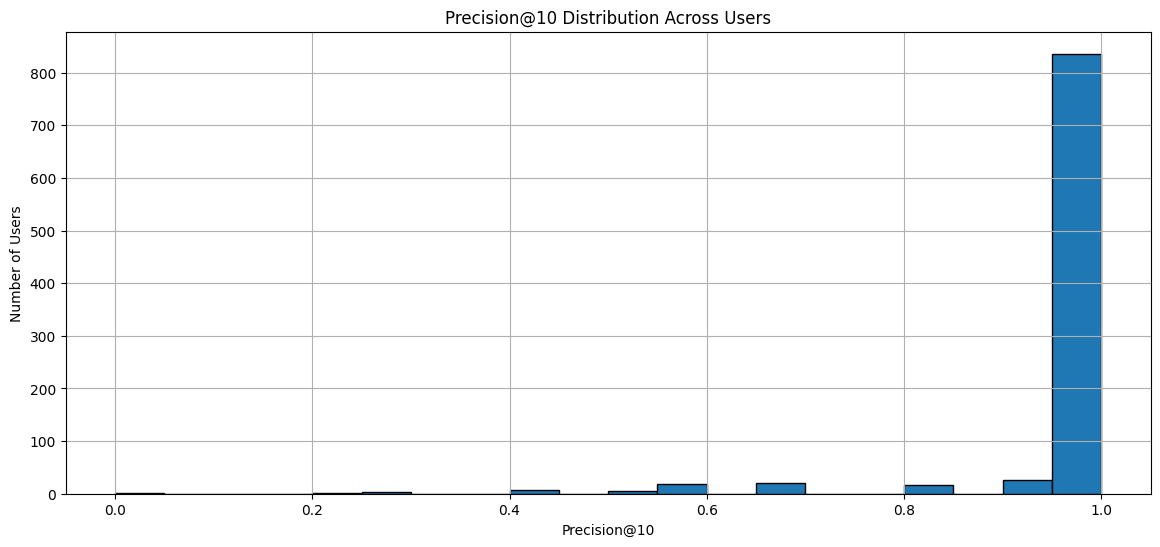

In [30]:
plt.figure(figsize=(14, 6))
plt.hist(precision_series, bins=20, edgecolor='black')
plt.title("Precision@10 Distribution Across Users")
plt.xlabel("Precision@10")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()
